In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#loading the dataset

df = pd.read_csv(r"E:\csv Files\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
'''Cleaning dataset'''

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Overall churn rate 26.536987079369588 %


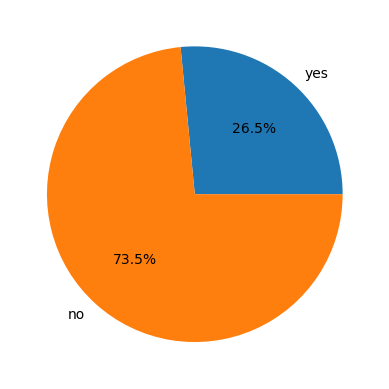

In [19]:
#churn rate of the company

total_customers = len(df)
churned_customers = len(df[df['Churn']=='Yes'])
churned_rate = (churned_customers/total_customers)*100

fig, ax = plt.subplots()
ax.pie([churned_rate, 100 - churned_rate], labels=['yes', 'no'] , autopct='%1.1f%%');
print(f"Overall churn rate {churned_rate} %")

Male:3555, Female:3488


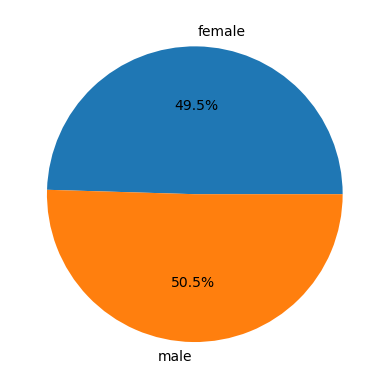

In [22]:
# ratio between males and females in the company

female_customers = len(df[df['gender']=='Female'])
male_customers = len(df[df['gender']=='Male'])


fig, ax = plt.subplots()
ax.pie([female_customers, male_customers], labels=['female', 'male'] , autopct='%1.1f%%');
print(f"Male:{male_customers}, Female:{female_customers}")



<Axes: xlabel='SeniorCitizen'>

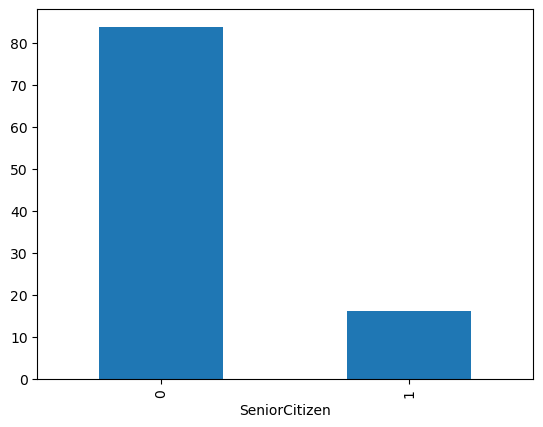

In [26]:
#ratio between senior citizens and the rest

x = df['SeniorCitizen'].value_counts(normalize=True)*100
x.plot.bar()

<Axes: >

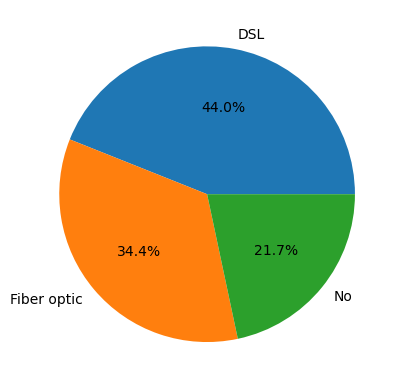

In [33]:
# number of internet services provided

df['InternetService'].value_counts().plot(kind = 'pie',labels=df['InternetService'].unique(),ylabel = '', autopct = "%1.1f%%")

In [37]:
# types of contracts provided by the company

contracts = df['Contract'].value_counts()
contracts_ratio = contracts/len(df)*100
for i,j in contracts_ratio.items():
    print(f"Contract_type: {i}, ratio: {j}")

Contract_type: Month-to-month, ratio: 55.01916796819537
Contract_type: Two year, ratio: 24.06644895641062
Contract_type: One year, ratio: 20.914383075394007


In [38]:
# types of payment mathods provided by the company

payment_method = df['PaymentMethod'].value_counts()
method_ratio = payment_method/len(df)*100
for i,j in method_ratio.items():
    print(f"payment_method: {i}, ratio: {j}")

payment_method: Electronic check, ratio: 33.57944057929859
payment_method: Mailed check, ratio: 22.887973874769273
payment_method: Bank transfer (automatic), ratio: 21.92247621752094
payment_method: Credit card (automatic), ratio: 21.61010932841119


In [41]:
#who is the most important customer(according to monthly and total charges)

customer_charges = df.groupby('customerID').agg({'MonthlyCharges':'sum','TotalCharges' : 'sum'})
most_imp_customers = customer_charges.idxmax()
most_imp_customers

MonthlyCharges    7569-NMZYQ
TotalCharges      9093-FPDLG
dtype: object

In [70]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
cat  = list(df.select_dtypes(include='object').columns)
del cat[0]
del cat[len(cat)-1]


In [75]:
num = list(df.select_dtypes(exclude='object').columns)
num

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

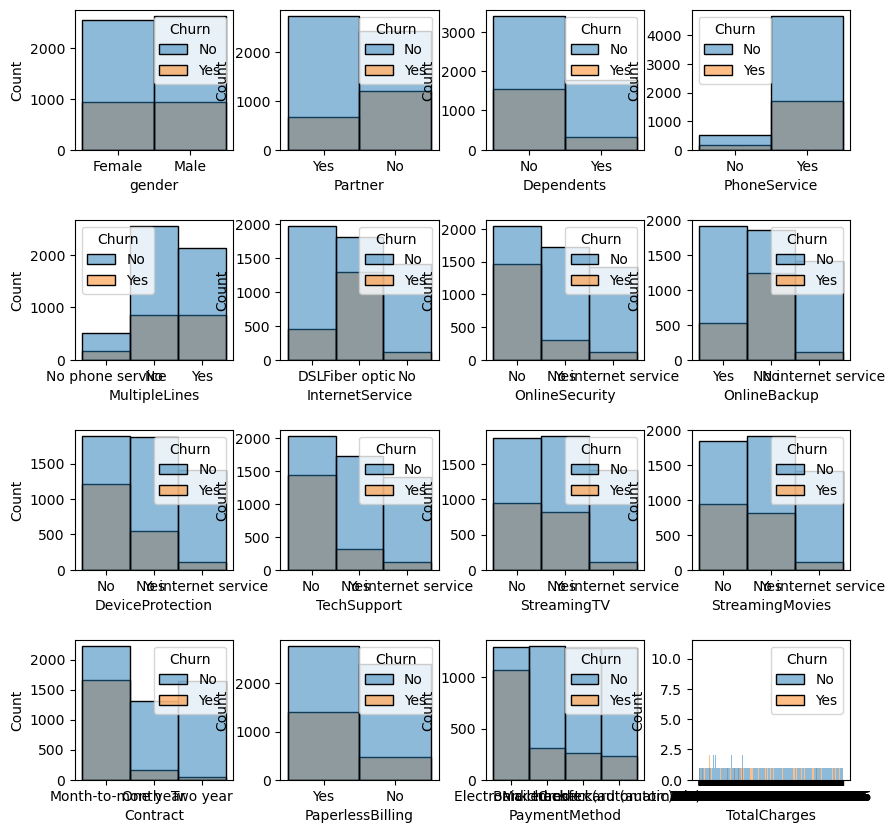

In [52]:
fig, axes = plt.subplots(4,4 , figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
axes = axes.flatten()
for i in range(len(cat)):
    sns.histplot(x = df[cat[i]], hue = df['Churn'],  bins = 40,ax=axes[i])

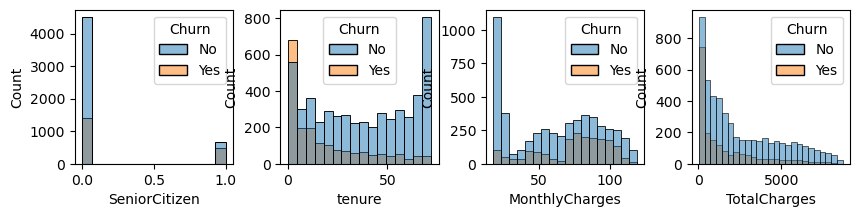

In [76]:
fig, axes = plt.subplots(1,4 , figsize=(10,2))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
axes = axes.flatten()
for i in range(len(num)):
    sns.histplot(x = df[num[i]], hue = df['Churn'],  ax=axes[i])

In [54]:
# Data pre-processing for machine learning

In [73]:
# Getting only the string features

cat_features = df.drop(['customerID','SeniorCitizen','tenure','MonthlyCharges','TotalCharges'], axis = 1)


In [71]:
# Getting only the numerical features

num_features = df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]


In [74]:
# changing string to float using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [77]:
mldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)


In [85]:
mldf = mldf.dropna()

In [78]:
from sklearn.model_selection import train_test_split


In [87]:
X = mldf.drop(['Churn'],axis=1)
y = mldf['Churn']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model = RandomForestClassifier(random_state=46)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [90]:
from sklearn.metrics import accuracy_score
preds = model.predict(X_test)
print(accuracy_score(preds,y_test))

0.7824213700990952
